In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from datetime import datetime
%matplotlib inline

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")
df['last_review'] = pd.to_datetime(df['last_review'])
df.info()
df.describe()
df.set_index('id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null datetime64[ns]
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-nu

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27


In [4]:
Q1 = df["price"].quantile(.25)
Q3 = df["price"].quantile(.75)
IQR = Q3 - Q1
print("The lower quartile of price is " + str(Q1) + ".")
print("The upper quartile of price is " + str(Q3) + ".")
print("The IQR of price is " + str(IQR) + ".")

ogprice = df['price']
noprice = ogprice[ogprice.between(ogprice.quantile(.05), ogprice.quantile(.95))]
df1 = df.copy()
df1['price'] = noprice

The lower quartile of price is 69.0.
The upper quartile of price is 175.0.
The IQR of price is 106.0.


The following categories of room type include: ['Private room' 'Entire home/apt' 'Shared room'].


Text(0.5, 1.0, 'Room Type Prices without Outliers')

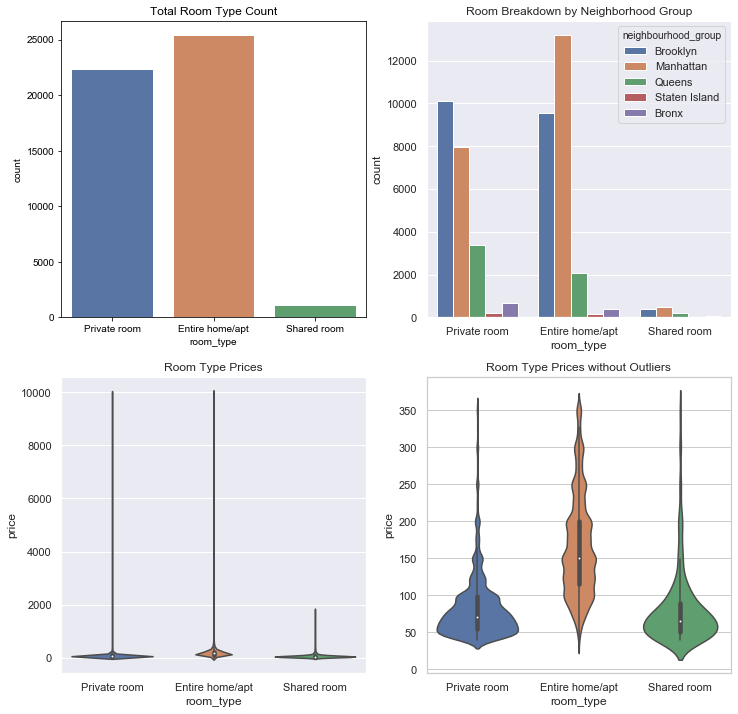

In [5]:
room_list = df["room_type"].unique()
print("The following categories of room type include: " + str(room_list) + ".")

plt.subplots(2, 2, figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.set(style="darkgrid")
sns.countplot(x="room_type", data=df)
plt.title("Total Room Type Count")

plt.subplot (2, 2, 2)
sns.set(style="darkgrid")
sns.countplot(x="room_type", hue="neighbourhood_group", data=df)
plt.title("Room Breakdown by Neighborhood Group")

plt.subplot(2, 2, 3)
sns.set(style='whitegrid')
sns.violinplot(x="room_type", y="price", data=df)
plt.title("Room Type Prices")

plt.subplot(2, 2, 4)
sns.set(style='whitegrid')
sns.violinplot(x="room_type", y="price", data=df1)
plt.title("Room Type Prices without Outliers")


In [6]:
Q1 = df["calculated_host_listings_count"].quantile(.25)
Q3 = df["calculated_host_listings_count"].quantile(.75)
IQR = Q3 - Q1
print("The lower quartile of listings count is " + str(Q1) + ".")
print("The upper quartile of listings count is " + str(Q3) + ".")
print("The IQR of listings is " + str(IQR) + ".")

oglistings = df['calculated_host_listings_count']
nolistings = oglistings[oglistings.between(oglistings.quantile(.05), oglistings.quantile(.95))]
df2 = df.copy()
df2['calculated_host_listings_count'] = nolistings

The lower quartile of listings count is 1.0.
The upper quartile of listings count is 2.0.
The IQR of listings is 1.0.


Now lets take a look deeper into the neighborhood groups...


Text(0.5, 1.0, 'Listings Count by Room Type')

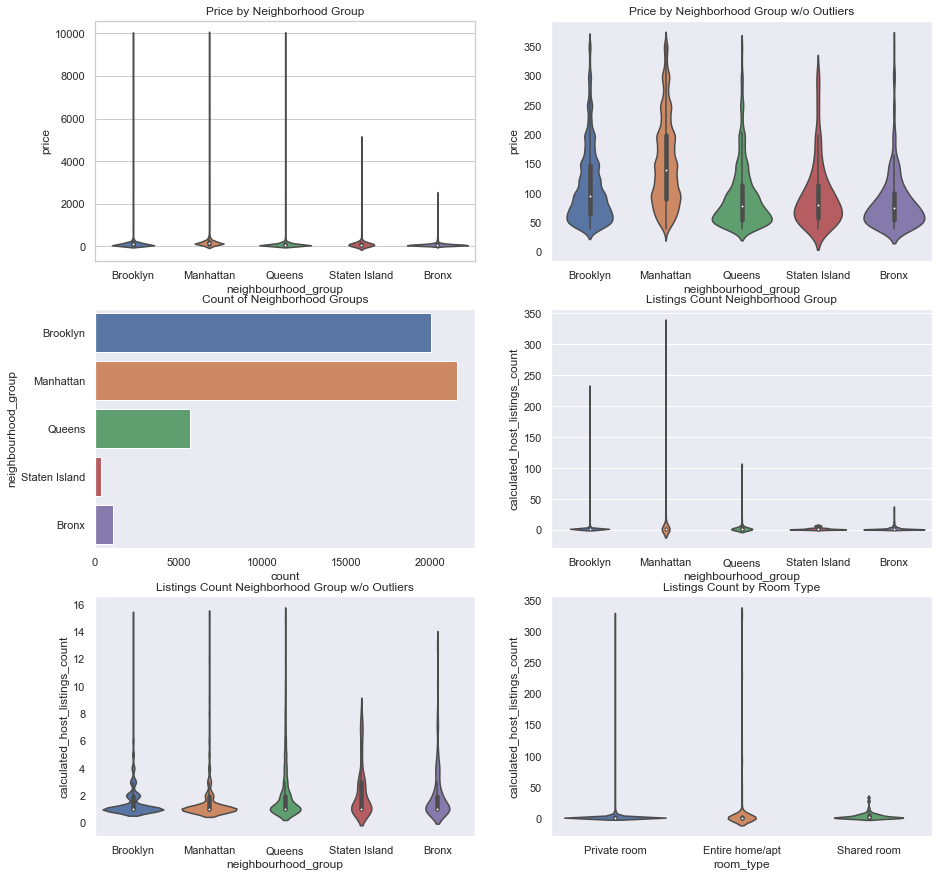

In [7]:
print("Now lets take a look deeper into the neighborhood groups...")

plt.subplots(3, 2, figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.set(style='dark')
sns.violinplot(x="neighbourhood_group", y="price", data=df)
plt.title("Price by Neighborhood Group")

plt.subplot(3, 2, 2)
sns.set(style='dark')
sns.violinplot(x="neighbourhood_group", y="price", data=df1)
plt.title("Price by Neighborhood Group w/o Outliers")

plt.subplot(3, 2, 3)
sns.set(style="darkgrid")
sns.countplot(y="neighbourhood_group", data=df)
plt.title("Count of Neighborhood Groups")

plt.subplot(3, 2, 4)
sns.set(style='dark')
sns.violinplot(x="neighbourhood_group", y="calculated_host_listings_count", data=df)
plt.title("Listings Count Neighborhood Group")

plt.subplot(3, 2, 5)
sns.set(style='dark')
sns.violinplot(x="neighbourhood_group", y="calculated_host_listings_count", data=df2)
plt.title("Listings Count Neighborhood Group w/o Outliers")

plt.subplot(3, 2, 6)
sns.set(style='dark')
sns.violinplot(x="room_type", y="calculated_host_listings_count", data=df)
plt.title("Listings Count by Room Type")

In [8]:
Q1 = df["reviews_per_month"].quantile(.25)
Q3 = df["reviews_per_month"].quantile(.75)
IQR = Q3 - Q1
print("The lower quartile of monthly reviews count is " + str(Q1) + ".")
print("The upper quartile of reviews count is " + str(Q3) + ".")
print("The IQR of monthly reviews is " + str(IQR) + ".")

ogreviews = df['reviews_per_month']
noreviews = ogreviews[ogreviews.between(ogreviews.quantile(.05), ogreviews.quantile(.95))]
df3 = df.copy()
df3['reviews_per_month'] = noreviews

The lower quartile of monthly reviews count is 0.19.
The upper quartile of reviews count is 2.02.
The IQR of monthly reviews is 1.83.


How many reviews are we getting?


Text(0.5, 1.0, 'Review Numbers by Neighborhood Group')

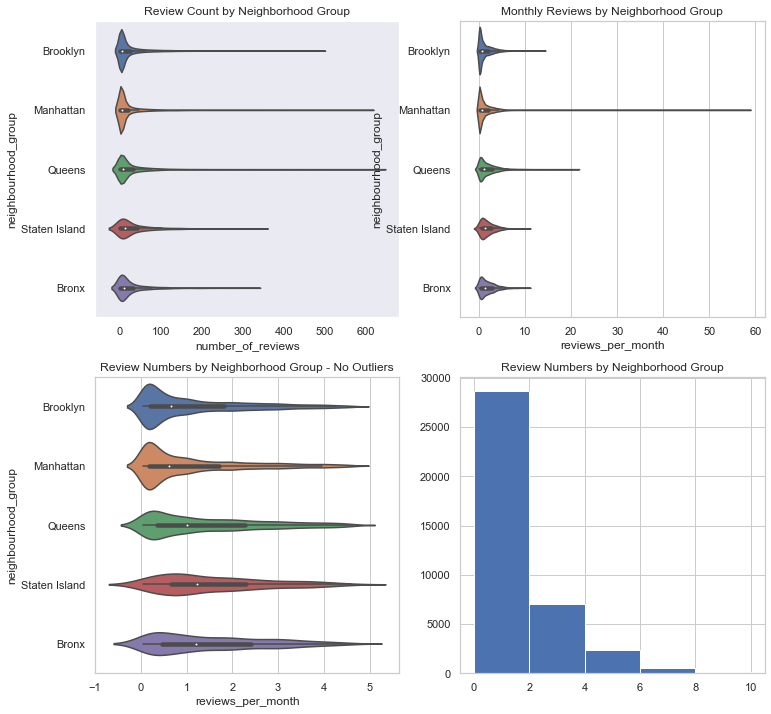

In [9]:
print("How many reviews are we getting?")

plt.subplots(2, 2, figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.set(style='whitegrid')
sns.violinplot(x="number_of_reviews", y="neighbourhood_group", data=df)
plt.title("Review Count by Neighborhood Group")

plt.subplot(2, 2, 2)
sns.set(style='whitegrid')
sns.violinplot(x="reviews_per_month", y="neighbourhood_group", data=df)
plt.title("Monthly Reviews by Neighborhood Group")

plt.subplot(2, 2, 3)
sns.set(style='whitegrid')
sns.violinplot(x="reviews_per_month", y="neighbourhood_group", data=df3)
plt.title("Review Numbers by Neighborhood Group - No Outliers")

plt.subplot(2, 2, 4)
sns.set(style='whitegrid')
plt.hist(df.reviews_per_month, bins=[0, 2, 4, 6, 8, 10])
plt.title("Review Numbers by Neighborhood Group")


In [10]:
print("Lets explore last review date.")

mindate = df['last_review'].min()
maxdate = df['last_review'].max()

print("Earliest review date was on " + str(mindate) + ".")
print("Latest review date was on " + str(maxdate) + ".")

start_date = '2019-01-01 00:00:00'
end_date = '2019-12-31 00:00:00'

mask = (df['last_review'] > start_date) & (df['last_review'] <= end_date)

Lets explore last review date.
Earliest review date was on 2011-03-28 00:00:00.
Latest review date was on 2019-07-08 00:00:00.


Text(0.5, 1.0, 'Room Breakdown by Neighborhood Group in 2019')

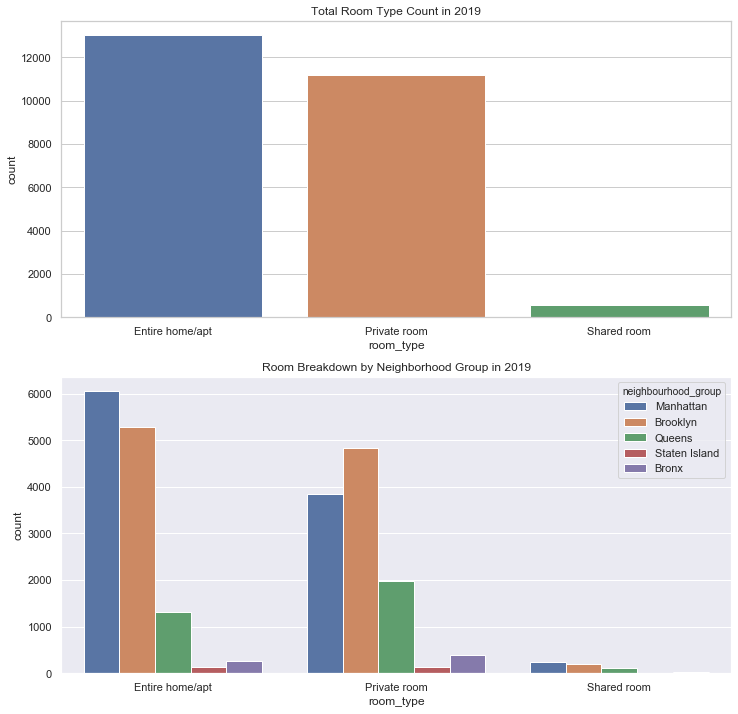

In [11]:
plt.subplots(2, 1, figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.set(style="darkgrid")
sns.countplot(x="room_type", data=df[mask])
plt.title("Total Room Type Count in 2019")

plt.subplot (2, 1, 2)
sns.set(style="darkgrid")
sns.countplot(x="room_type", hue="neighbourhood_group", data=df[mask])
plt.title("Room Breakdown by Neighborhood Group in 2019")

Does availability have anything to do with this?
Eh.....not really.


Text(0.5, 1.0, 'Availability and Review Count')

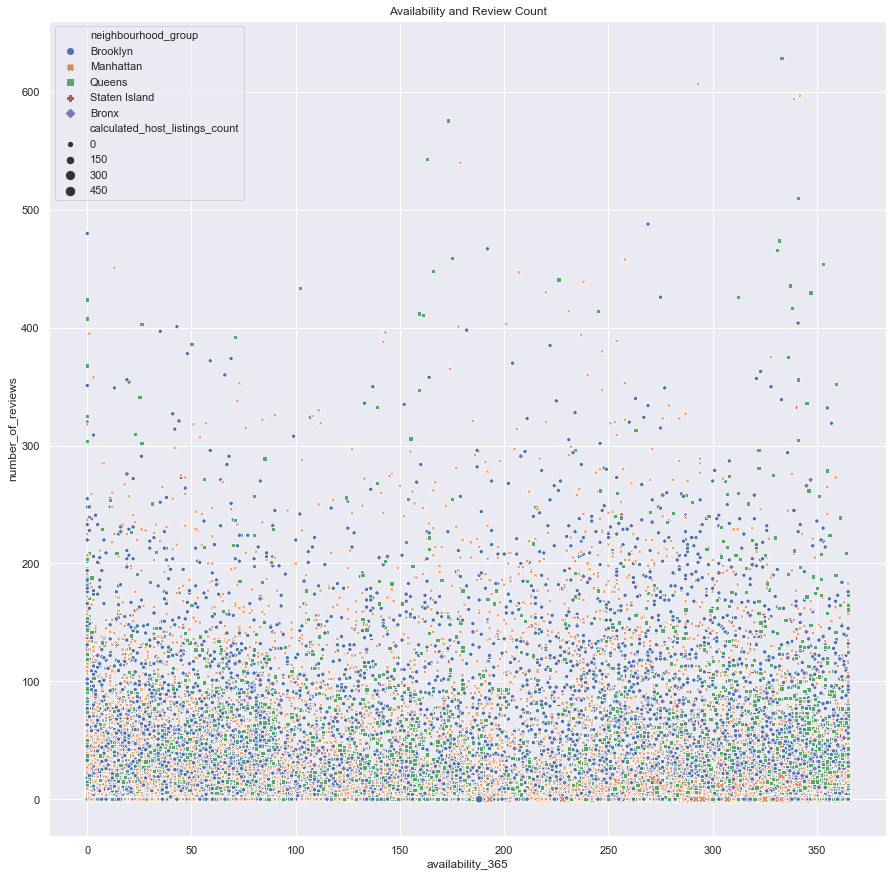

In [12]:
print("Does availability have anything to do with this?")

print("Eh.....not really.")

plt.subplots(figsize=(15, 15))

sns.scatterplot(x='availability_365', y='number_of_reviews', data=df, style="neighbourhood_group",
                size="calculated_host_listings_count", hue='neighbourhood_group')
plt.title("Availability and Review Count")

Lastly, some insights on price...


Text(0.5, 1.0, 'Price and Review Count Breakdown')

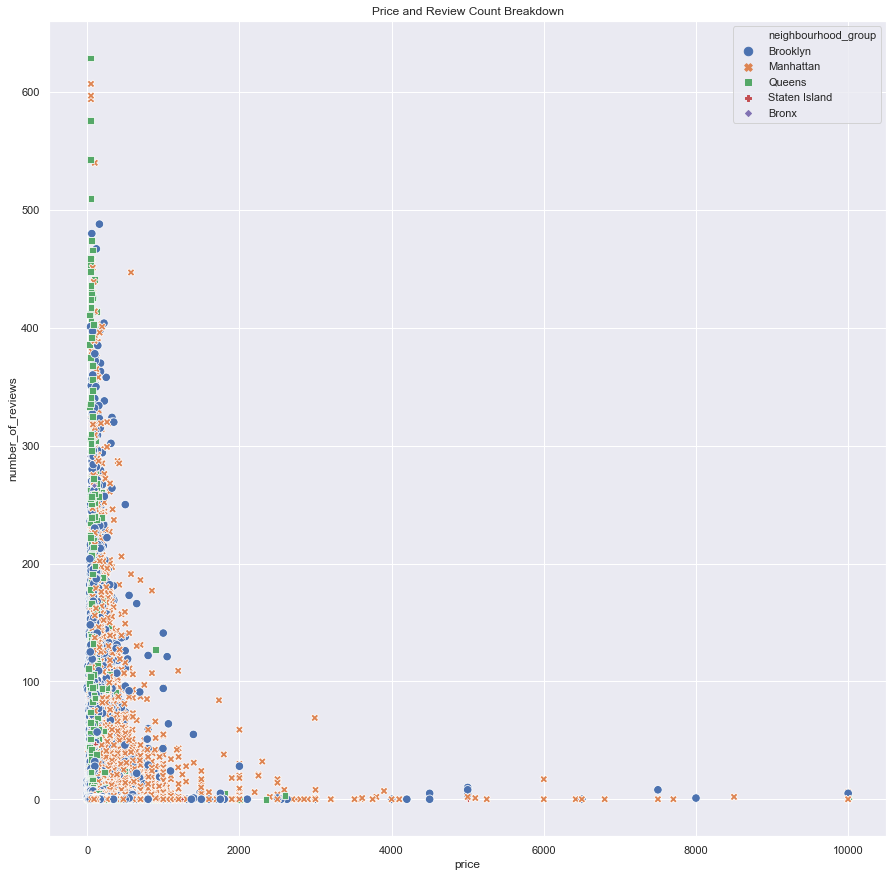

In [13]:
print("Lastly, some insights on price...")

plt.subplots(figsize=(15, 15))

sns.scatterplot(x='price', y='number_of_reviews', data=df, style="neighbourhood_group",
                size="neighbourhood_group", hue='neighbourhood_group')
plt.title("Price and Review Count Breakdown")

Text(0.5, 1, 'Correlation of all values')

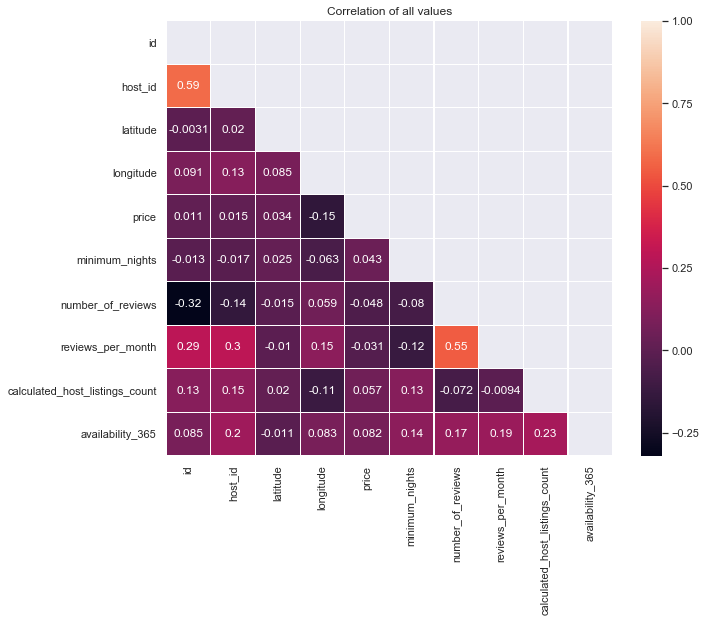

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
maskcorr = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, linewidths=.1, mask=maskcorr)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation of all values")

Text(0.5, 1, 'Correlation with Just Select Numerical Values')

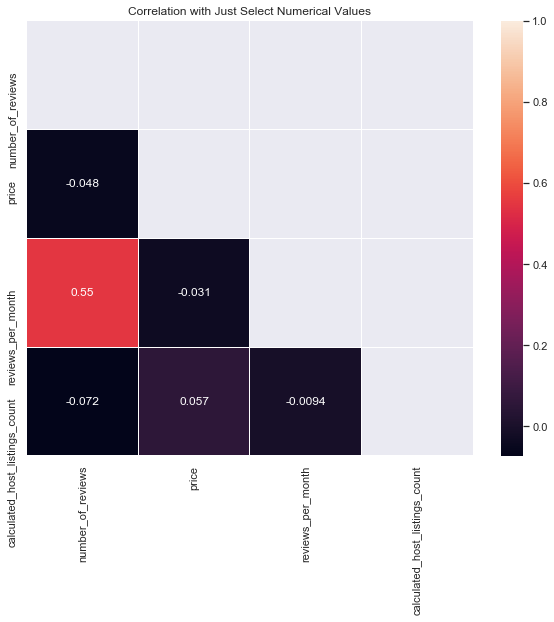

In [18]:
filt = ['number_of_reviews', 'price', 'reviews_per_month', 'calculated_host_listings_count']

df1 = df[filt]

f, ax = plt.subplots(figsize=(10, 8))
corr2 = df1.corr()
maskcorr2 = np.triu(np.ones_like(corr2, dtype=np.bool))
sns.heatmap(corr2, annot=True, linewidths=.1, mask=maskcorr2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation with Just Select Numerical Values")

In [24]:
dependentVar = df['calculated_host_listings_count']
filt2 = ['price', 'reviews_per_month', 'number_of_reviews']
#----write your code below------

from statsmodels.formula.api import ols

model_fit = ols(formula="dependentVar ~ df[filt2]", data=df)
model_fit = model_fit.fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           dependentVar   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     90.99
Date:                Thu, 30 Jan 2020   Prob (F-statistic):           1.12e-58
Time:                        02:35:07   Log-Likelihood:            -1.8197e+05
No. Observations:               38843   AIC:                         3.640e+05
Df Residuals:                   38839   BIC:                         3.640e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.6811      0.200     23.367   